<a href="https://colab.research.google.com/github/RTae/Compter-Vision-Nano-Degree/blob/main/1_1_Image_Representation/4_Green_Screen_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Color Threshold, Green Screen

### Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [3]:
!gdown --id 12YVaaEenpH-9yT7YSI2JPzuxZT3hYPsy

Downloading...
From: https://drive.google.com/uc?id=12YVaaEenpH-9yT7YSI2JPzuxZT3hYPsy
To: /content/car_green_screen.jpg
100% 32.1k/32.1k [00:00<00:00, 11.9MB/s]


In [4]:
# Read in the image
image = mpimg.imread('./car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)


Image dimensions: (450, 660, 3)


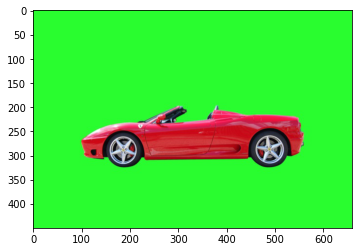

In [5]:
# Display the image
plt.imshow(image)

### Define the color threshold

In [6]:
## TODO: Define our color selection boundaries in RGB values
lower_green = np.array([0,200,0]) 
upper_green = np.array([255,255,255])



### Create a mask

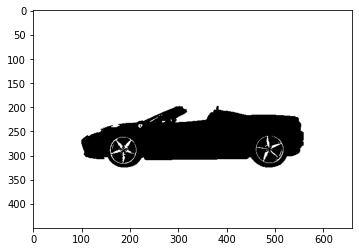

In [7]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

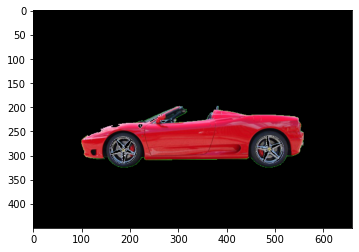

In [8]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


### Mask and add a background image

In [10]:
!gdown --id 1Qe5VOa1TSmfxEcJVeQgSe9J27bmRzmBO

Downloading...
From: https://drive.google.com/uc?id=1Qe5VOa1TSmfxEcJVeQgSe9J27bmRzmBO
To: /content/sky.jpg
100% 65.0k/65.0k [00:00<00:00, 60.9MB/s]


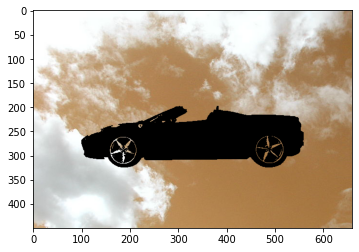

In [11]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('./sky.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

## TODO: Crop it or resize the background to be the right size (450x660)
crop_background = background_image[:450,:660]

## TODO: Mask the cropped background so that the pizza area is blocked
# Hint mask the opposite area of the previous image
crop_background[mask==0] = [0,0,0]

## TODO: Display the background and make sure 
plt.imshow(crop_background)

### Create a complete image

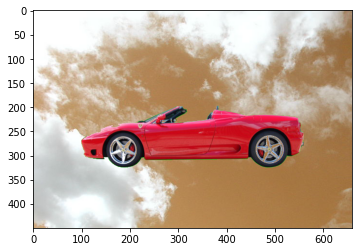

In [14]:
## TODO: Add the two images together to create a complete image!
# complete_image = masked_image + crop_background
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)